In [1]:
import pandas as pd


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("retail_sales.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.shape


(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
df['Date']= pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [11]:
df['Month']= df['Date'].dt.month

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 74.3+ KB


In [14]:
df['Year'] = df['Date'].dt.year


In [16]:
df[['Date','Year','Month']].head()

,Date,Year,Month
0,2023-11-24,2023,11
1,2023-02-27,2023,2
2,2023-01-13,2023,1
3,2023-05-21,2023,5
4,2023-05-06,2023,5


In [19]:
df['Total Sales']= df['Total Amount'].sum()

In [25]:
df['Total Transactions']= df['Transaction ID'].count()

np.int64(1000)

In [29]:
total_sales = df['Total Amount'].sum()



In [30]:
total_transactions = df['Total Transactions'].count()

In [31]:
average_order_value = total_sales/total_transactions

In [32]:
print(average_order_value)

456.0


In [33]:
df.groupby('Product Category')['Total Amount'].sum()

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

In [36]:
monthly_sales = df.groupby('Month')['Total Amount'].sum()

In [37]:
print(monthly_sales)

Month
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64


In [42]:
gender_sales = df.groupby(['Product Category','Gender'])['Total Amount'].sum()

In [43]:
print(gender_sales)

Product Category  Gender
Beauty            Female    74830
                  Male      68685
Clothing          Female    81275
                  Male      74305
Electronics       Female    76735
                  Male      80170
Name: Total Amount, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

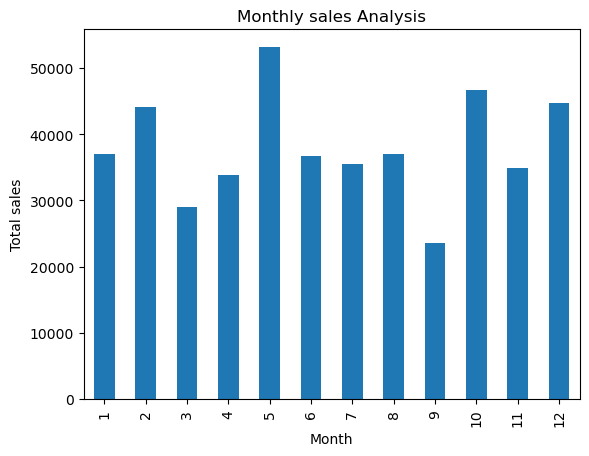

In [44]:
monthly_sales.plot(kind='bar')
plt.title('Monthly sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.show


In [45]:
category_sales= df.groupby('Product Category')['Total Amount'].sum()

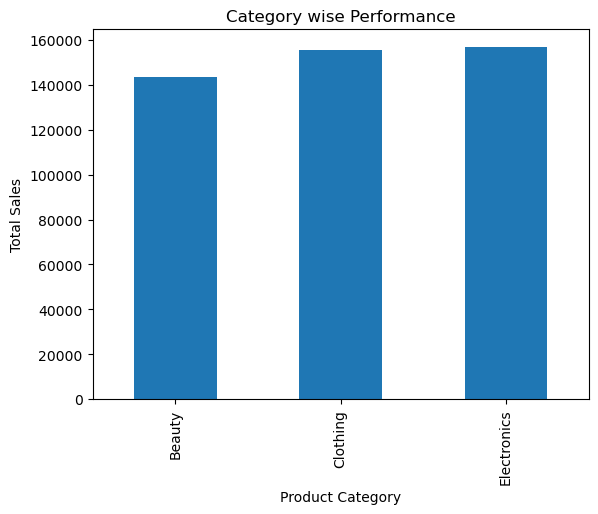

In [46]:
category_sales.plot(kind='bar')
plt.title('Category wise Performance')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

In [49]:
genderwise_sales = df.groupby(['Gender','Product Category'])['Total Amount'].sum()

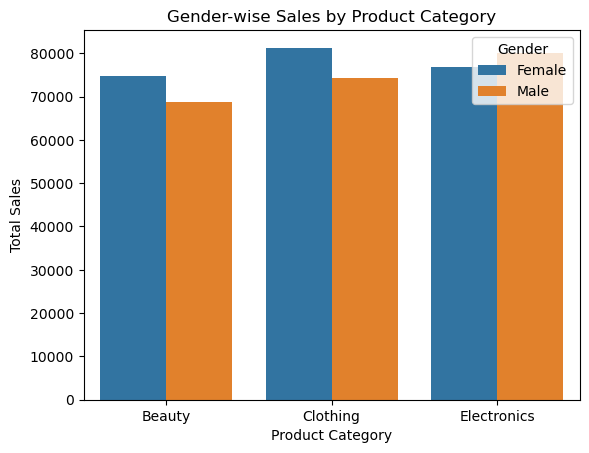

In [59]:
gender_category_sales = df.groupby(
    ['Product Category', 'Gender']
)['Total Amount'].sum().reset_index()

sns.barplot(
    data=gender_category_sales,
    x='Product Category',
    y='Total Amount',
    hue='Gender'
)

plt.title('Gender-wise Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()